**Uploading and Preparing the Dataset**

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [ ]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors


In [ ]:
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


**Import Required Libraries**

In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

<ipython-input-4-4addd0ae159c>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [ ]:
os.chdir('/content/yes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,99):
    y.append('N')
print(y)

  0%|          | 0/155 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  0%|          | 0/98 [00:00<?, ?it/s]

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

**Data Visualization**

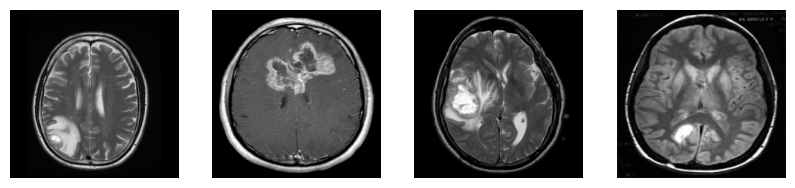

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

**Enhanced Data Loading and Verification**

In [ ]:
import os
from collections import Counter

# Count files in each directory
yes_dir = '/content/yes'
no_dir = '/content/no'

yes_files = os.listdir(yes_dir)
no_files = os.listdir(no_dir)

print(f"Number of 'yes' (tumor) images: {len(yes_files)}")
print(f"Number of 'no' (non-tumor) images: {len(no_files)}")

# Check file extensions
def check_extensions(files):
    extensions = [os.path.splitext(f)[1] for f in files]
    return Counter(extensions)

print("\nFile extensions in 'yes' folder:")
print(check_extensions(yes_files))

print("\nFile extensions in 'no' folder:")
print(check_extensions(no_files))

Number of 'yes' (tumor) images: 155
Number of 'no' (non-tumor) images: 98

File extensions in 'yes' folder:
Counter({'.jpg': 86, '.JPG': 68, '.png': 1})

File extensions in 'no' folder:
Counter({'.jpg': 85, '.JPG': 6, '.jpeg': 6, '.png': 1})


**Image Metadata Analysis**

In [ ]:
import cv2
import pandas as pd

def analyze_images(folder_path, label):
    data = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            data.append({
                'filename': filename,
                'label': label,
                'height': img.shape[0],
                'width': img.shape[1],
                'channels': img.shape[2] if len(img.shape) > 2 else 1,
                'dtype': img.dtype
            })
    return pd.DataFrame(data)

# Analyze both folders
yes_df = analyze_images(yes_dir, 'yes')
no_df = analyze_images(no_dir, 'no')

# Combine and analyze
image_df = pd.concat([yes_df, no_df])
print("\nImage statistics:")
print(image_df.groupby('label').describe())


Image statistics:
      height                                                              \
       count        mean         std    min    25%    50%    75%     max   
label                                                                      
no      98.0  342.234694  182.356217  168.0  225.0  251.0  442.0  1080.0   
yes    155.0  413.703226  226.699904  173.0  296.5  344.0  405.5  1427.0   

       width              ...                channels                      \
       count        mean  ...    75%     max    count mean  std  min  25%   
label                     ...                                               
no      98.0  343.163265  ...  426.0  1920.0     98.0  3.0  0.0  3.0  3.0   
yes    155.0  361.238710  ...  354.0  1275.0    155.0  3.0  0.0  3.0  3.0   

                      
       50%  75%  max  
label                 
no     3.0  3.0  3.0  
yes    3.0  3.0  3.0  

[2 rows x 24 columns]


**Enhanced Visual Exploration**

Sample tumor images:


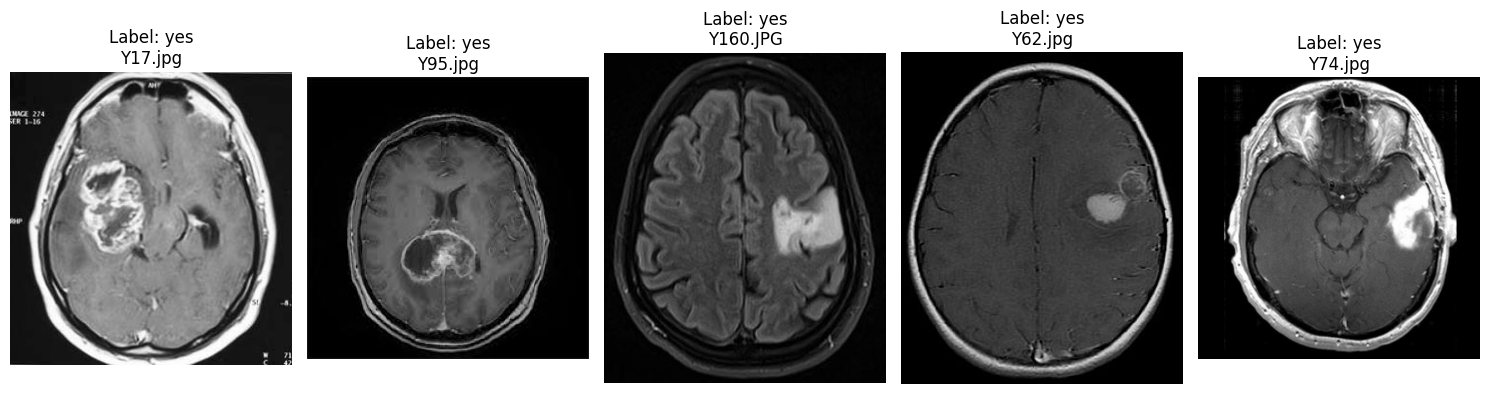


Sample non-tumor images:


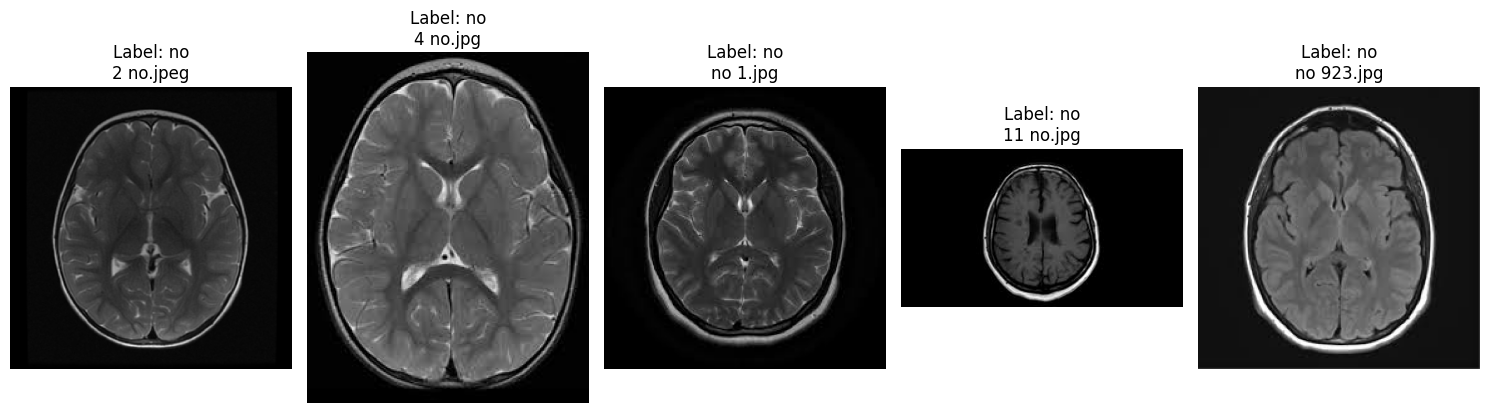

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display_samples(df, folder_path, n=5):
    plt.figure(figsize=(15, 5))
    samples = df.sample(n)
    for i, (_, row) in enumerate(samples.iterrows(), 1):
        img = cv2.imread(os.path.join(folder_path, row['filename']))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, n, i)
        plt.imshow(img)
        plt.title(f"Label: {row['label']}\n{row['filename']}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display samples from both classes
print("Sample tumor images:")
display_samples(yes_df, yes_dir)

print("\nSample non-tumor images:")
display_samples(no_df, no_dir)

**Pixel Intensity Analysis**

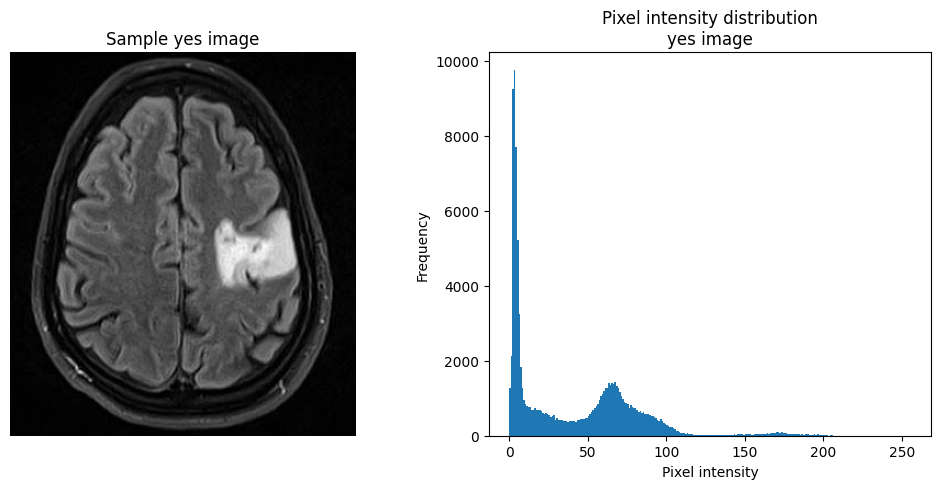

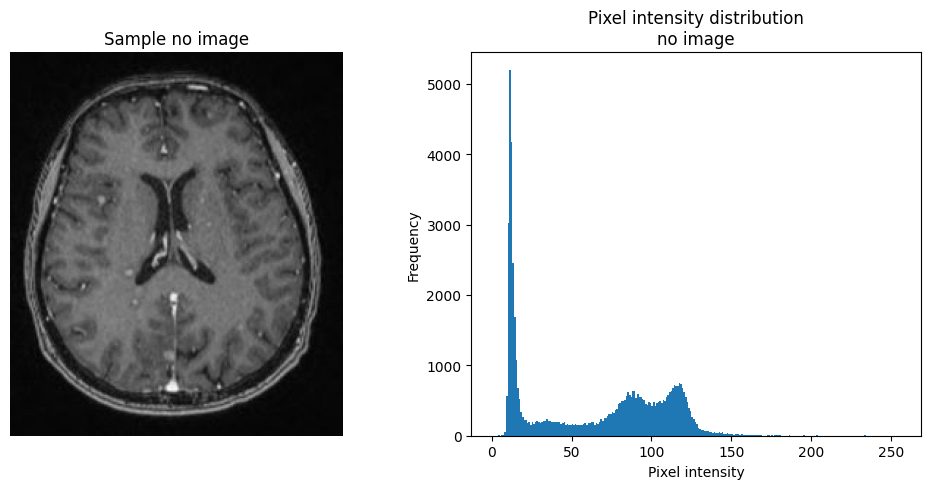

In [ ]:
def plot_pixel_intensity(df, folder_path, label):
    plt.figure(figsize=(10, 5))

    # Random sample
    sample = df[df['label'] == label].sample(1).iloc[0]
    img = cv2.imread(os.path.join(folder_path, sample['filename']))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Plot image and histogram
    plt.subplot(1, 2, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title(f"Sample {label} image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.hist(img_gray.ravel(), bins=256, range=(0, 256))
    plt.title(f"Pixel intensity distribution\n{label} image")
    plt.xlabel("Pixel intensity")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Plot for both classes
plot_pixel_intensity(image_df, yes_dir, 'yes')
plot_pixel_intensity(image_df, no_dir, 'no')

**Class Imbalance Analysis**

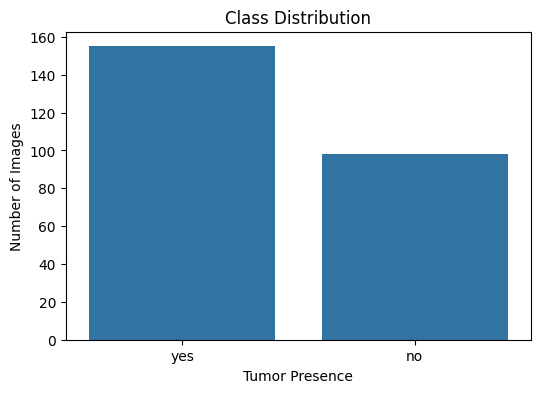

Class distribution:
Yes (tumor): 155 (61.3%)
No (no tumor): 98 (38.7%)
Imbalance ratio: 1.58:1


In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=image_df)
plt.title("Class Distribution")
plt.xlabel("Tumor Presence")
plt.ylabel("Number of Images")
plt.show()

# Calculate imbalance ratio
total = len(image_df)
yes_count = len(yes_df)
no_count = len(no_df)

print(f"Class distribution:\nYes (tumor): {yes_count} ({yes_count/total:.1%})\nNo (no tumor): {no_count} ({no_count/total:.1%})")
print(f"Imbalance ratio: {yes_count/no_count:.2f}:1")

**Image Quality Assessment**

In [ ]:
def assess_image_quality(df, folder_path):
    quality_metrics = []
    for _, row in df.iterrows():
        img_path = os.path.join(folder_path, row['filename'])

        # Check if the file exists and is readable
        if os.path.exists(img_path):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Calculate metrics only if image is loaded successfully
                blur = cv2.Laplacian(img, cv2.CV_64F).var()
                brightness = img.mean()
                contrast = img.std()

                quality_metrics.append({
                    'filename': row['filename'],
                    'label': row['label'],
                    'blur': blur,
                    'brightness': brightness,
                    'contrast': contrast
                })
            #else:
                #print(f"Warning: Could not read image at {img_path}")  # Print a warning if image loading fails
        #else:
            #print(f"Warning: Image file not found at {img_path}")  # Print a warning if file does not exist

    return pd.DataFrame(quality_metrics)

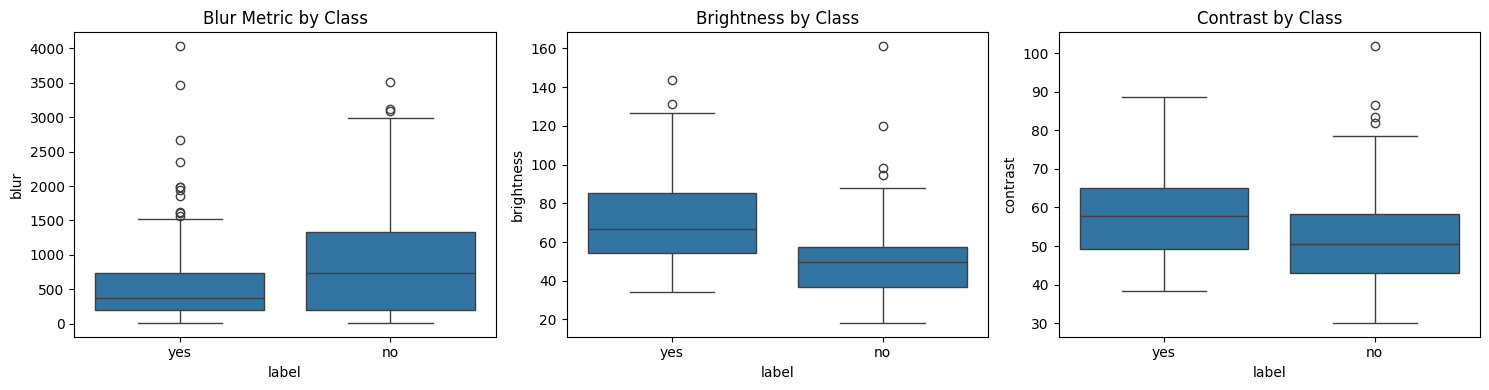

In [ ]:
# Assess quality for all images
quality_df = assess_image_quality(image_df, yes_dir)
quality_df = pd.concat([quality_df, assess_image_quality(image_df, no_dir)])

# Plot quality metrics by class
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='label', y='blur', data=quality_df)
plt.title("Blur Metric by Class")

plt.subplot(1, 3, 2)
sns.boxplot(x='label', y='brightness', data=quality_df)
plt.title("Brightness by Class")

plt.subplot(1, 3, 3)
sns.boxplot(x='label', y='contrast', data=quality_df)
plt.title("Contrast by Class")

plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [ ]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (169, 224, 224, 3)
X_test Shape:  (84, 224, 224, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


**Feature Correlation Analysis**

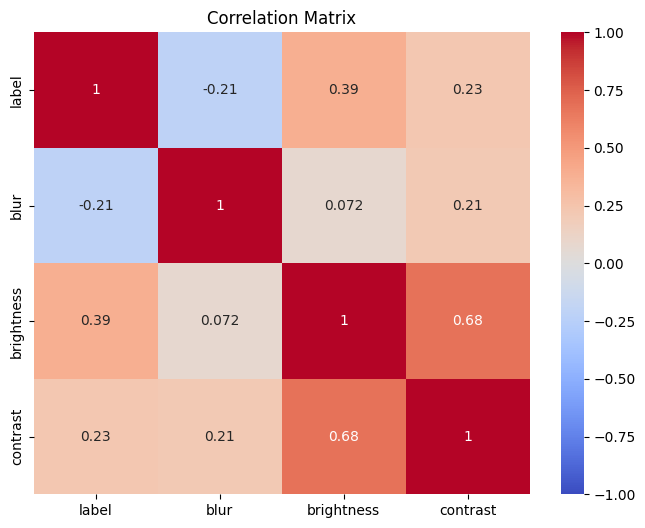

In [ ]:
# Calculate correlation between quality metrics and class
corr_df = quality_df.copy()
corr_df['label'] = corr_df['label'].map({'yes': 1, 'no': 0})

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df[['label', 'blur', 'brightness', 'contrast']].corr(),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

**Advanced Visualization - t-SNE of Image Features**

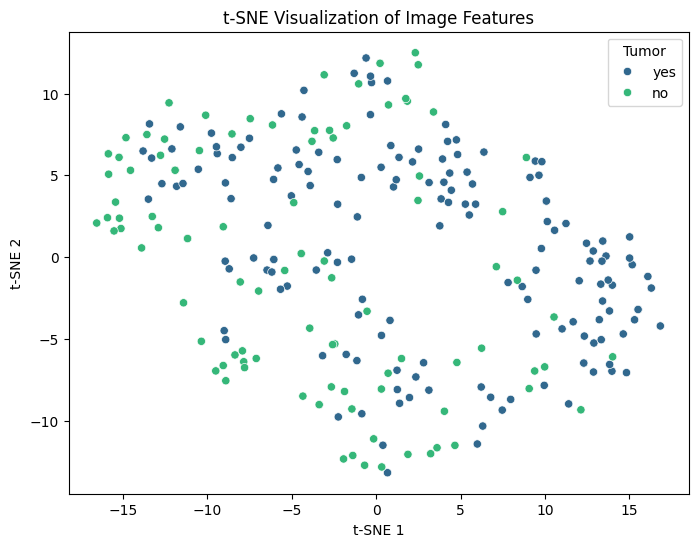

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Extract features (using simple features for demonstration)
features = quality_df[['blur', 'brightness', 'contrast']]
labels = quality_df['label']

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels, palette='viridis')
plt.title("t-SNE Visualization of Image Features")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Tumor")
plt.show()

**Building the Model**

In [ ]:
from keras.applications import vgg16


img_rows, img_cols = 224, 224


vgg = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers
# Layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False

# Let's print our layers
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │         525,3

 Total params: 16,815,426 (64.15 MB)

 Trainable params: 2,100,738 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


**Training the Model**

In [ ]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,
                    epochs=10,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 186s 33s/step - accuracy: 0.9561 - loss: 0.1025 - val_accuracy: 0.8571 - val_loss: 0.4624
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 202s 33s/step - accuracy: 0.9711 - loss: 0.1021 - val_accuracy: 0.8810 - val_loss: 0.5565
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 202s 33s/step - accuracy: 0.9818 - loss: 0.0496 - val_accuracy: 0.8929 - val_loss: 0.5701
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 202s 33s/step - accuracy: 1.0000 - loss: 0.0155 - val_accuracy: 0.8690 - val_loss: 0.6382
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 186s 33s/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.9167 - val_loss: 0.6020
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 170s 27s/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 0.8690 - val_loss: 0.6432
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 233s 33s/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.8690 - val_loss: 0.7379
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 202s 33s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8571 - val_loss:

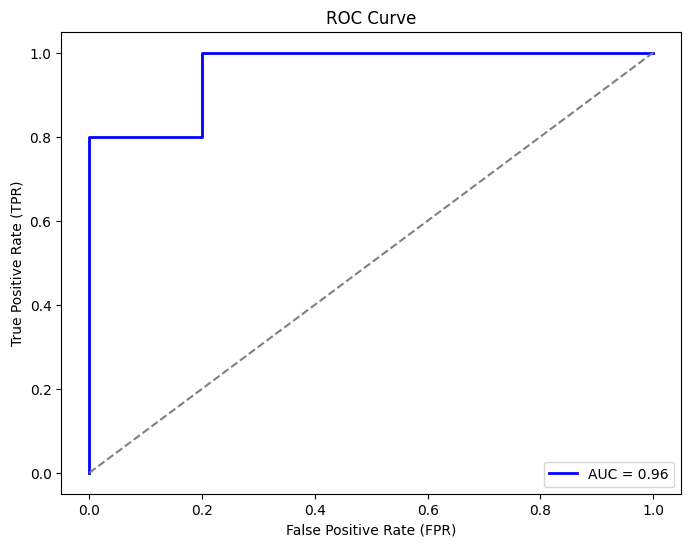

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Sample true labels and predicted probabilities
y_true = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0])  # Actual classes (0 = No Tumor, 1 = Tumor)
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.65, 0.3, 0.9, 0.2, 0.85, 0.05])  # Model's probability scores

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
!pip install scikit-learn

**Visualization of Results**

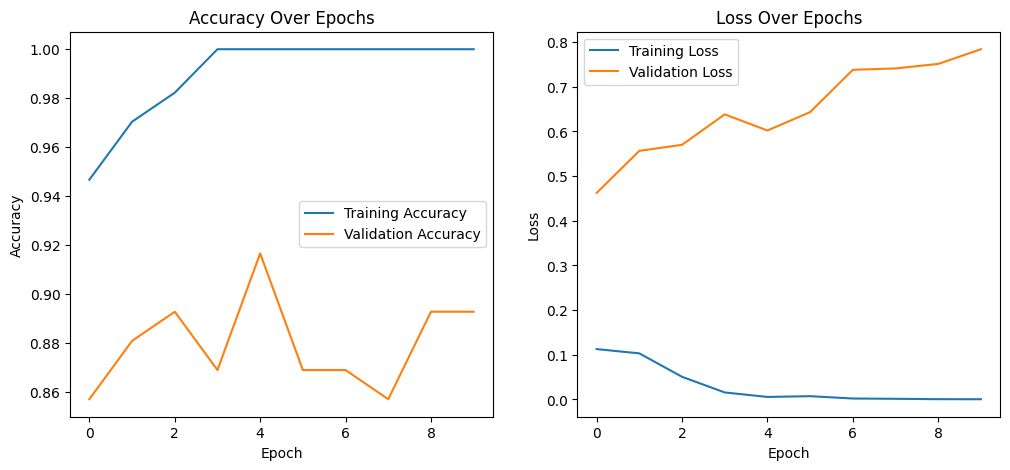

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 51s 16s/step - accuracy: 0.8839 - loss: 0.9832
Test Accuracy: 0.8929
Test Loss: 0.7840


3/3 ━━━━━━━━━━━━━━━━━━━━ 51s 16s/step


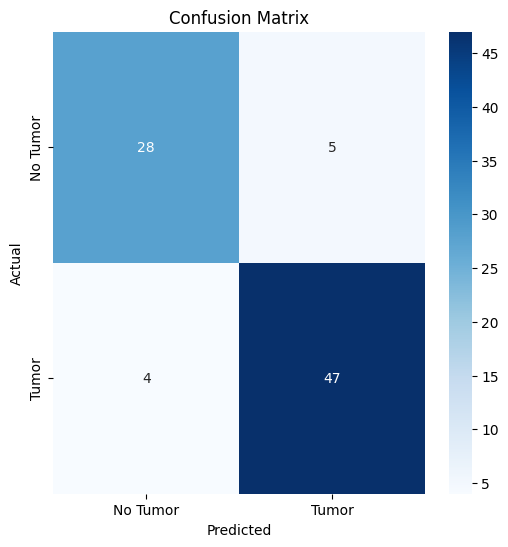

              precision    recall  f1-score   support

    No Tumor       0.88      0.85      0.86        33
       Tumor       0.90      0.92      0.91        51

    accuracy                           0.89        84
   macro avg       0.89      0.89      0.89        84
weighted avg       0.89      0.89      0.89        84



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Tumor", "Tumor"],
            yticklabels=["No Tumor", "Tumor"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_true_classes, y_pred_classes, target_names=["No Tumor", "Tumor"]))

**Evaluating the Model**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Get predictions for the entire test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Calculate F1 score
f1 = f1_score(y_true_classes, y_pred_classes, average='binary')  # Use 'binary' for binary classification
print(f"F1 Score: {f1}")

# Get predictions for the entire test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy: {accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 53s 16s/step
F1 Score: 0.912621359223301
3/3 ━━━━━━━━━━━━━━━━━━━━ 53s 16s/step
Accuracy: 0.8928571428571429


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Get predictions for the entire test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Calculate precision and recall
precision = precision_score(y_true_classes, y_pred_classes, average='binary')  # Use 'binary' for binary classification
recall = recall_score(y_true_classes, y_pred_classes, average='binary')  # Use 'binary' for binary classification

print(f"Precision: {precision}")
print(f"Recall: {recall}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 51s 16s/step
Precision: 0.9038461538461539
Recall: 0.9215686274509803


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Convert to a DataFrame
cm_df = pd.DataFrame(cm, columns=["Predicted No", "Predicted Yes"], index=["Actual No", "Actual Yes"])

# Reshape the confusion matrix into a long format
cm_long = cm_df.stack().reset_index()
cm_long.columns = ["Actual", "Predicted", "Count"]

# Save to CSV
cm_long.to_csv('confusion_matrix_long.csv', index=False)

# Print the reshaped data
print(cm_long)

       Actual      Predicted  Count
0   Actual No   Predicted No     28
1   Actual No  Predicted Yes      5
2  Actual Yes   Predicted No      4
3  Actual Yes  Predicted Yes     47


**Saving and Downloading Results**

In [ ]:
import pandas as pd

# Save evaluation metrics to a CSV file
metrics = {
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1]
}

metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv('evaluation_metrics.csv', index=False)

# Save predictions to a CSV file
predictions_df = pd.DataFrame({
    'Actual': y_true_classes,
    'Predicted': y_pred_classes
})

predictions_df.to_csv('predictions.csv', index=False)

In [ ]:
from google.colab import files

# Download evaluation_metrics.csv
files.download('evaluation_metrics.csv')

# Download predictions.csv
files.download('predictions.csv')

# Download confusion_matrix_long.csv
files.download('confusion_matrix_long.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save evaluation metrics to Google Drive
metrics_df.to_csv('/content/drive/My Drive/evaluation_metrics.csv', index=False)

# Save predictions to Google Drive
predictions_df.to_csv('/content/drive/My Drive/predictions.csv', index=False)

# Save confusion matrix long to Google Drive
cm_long.to_csv('/content/drive/My Drive/confusion_matrix_long.csv', index=False)

**Visualization of Results**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


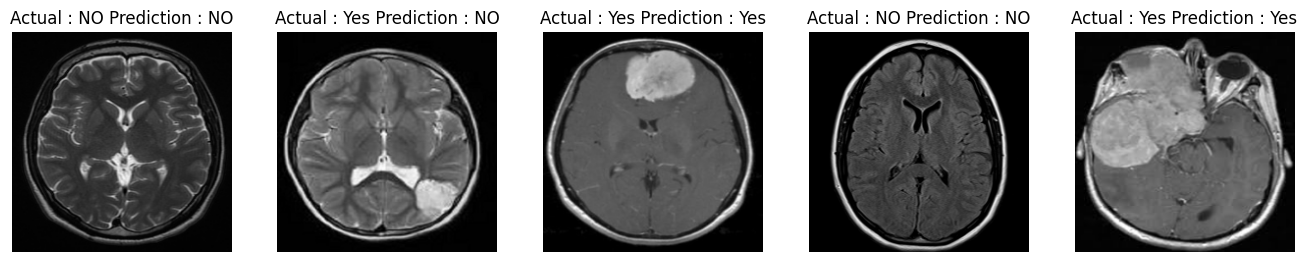

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Mapping dictionary
mapping = {0: "NO", 1: "Yes"}

# Create a figure to display the images
fig = plt.figure(figsize=(20, 20))

# Loop through the first 5 images in the test set
for i in range(5):
    # Get the image and its corresponding label
    data = X_test[i]
    target = y_test[i]

    # Reshape the image to match the input shape of the model
    data = np.expand_dims(data, axis=0)

    # Get the model's prediction
    pred = model.predict(data) # Assuming 'model' is your trained Keras model

    # Convert the prediction to a class label
    pred_class = np.argmax(pred, axis=1)[0]
    actual_class = np.argmax(target, axis=0)

    # Display the image along with the actual and predicted labels
    plt.subplot(6, 6, i + 1)
    plt.imshow(data[0])
    plt.title(f"Actual : {mapping[actual_class]} Prediction : {mapping[pred_class]}")
    plt.axis('off')

plt.show()

In [ ]:
# Save training history
history_df = pd.DataFrame({
    'Epoch': range(len(acc)),
    'Training Accuracy': acc,
    'Validation Accuracy': val_acc,
    'Training Loss': loss,
    'Validation Loss': val_loss
})
history_df.to_csv('training_history.csv', index=False)

from google.colab import files
files.download('training_history.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Evaluating the Model**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='binary')  # Use 'binary' for binary classification
recall = recall_score(y_true_classes, y_pred_classes, average='binary')      # Use 'binary' for binary classification
f1 = f1_score(y_true_classes, y_pred_classes, average='binary')             # Use 'binary' for binary classification

# Print metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Accuracy: 89.29%
Precision: 90.38%
Recall: 92.16%
F1 Score: 91.26%


In [ ]:
model.save('/content/brain_tumor_model.h5')  # Saved in Colab's temporary storage

In [ ]:
from google.colab import files
files.download('/content/brain_tumor_model.h5')